In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def initialize_population( num_individuals, num_variables ):
    """
    Khởi tạo quần thể gồm num_individuals cá thể. Mỗi cá thể có num_parameters biến.
    
    Arguments:
    num_individuals -- Số lượng cá thể
    num_variables -- Số lượng biến
    
    Returns:
    pop -- Ma trận (num_individuals, num_variables) chứa quần thể mới được khởi tạo ngẫu nhiên.
    """
    
    ### BẮT ĐẦU CODE TỪ ĐÂY ### 
    pop = np.random.randint(2, size=(num_individuals, num_variables))
    
    ### DỪNG CODE TẠI ĐÂY ###
    
    return pop

In [3]:
pop = initialize_population(8, 4)
pop

array([[0, 1, 0, 0],
       [0, 0, 0, 1],
       [1, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 0],
       [1, 0, 0, 0]])

In [4]:
def onemax( ind ):
    """
    Hàm đánh giá OneMax: Đếm số bit 1 trong chuỗi nhị phân (cá thể ind).
    
    Arguments:
    ind -- Cá thể cần được đánh giá.

    Returns:
    value -- Giá trị của cá thể ind.
    """
    
    ### BẮT ĐẦU CODE TỪ ĐÂY ###     
    value = np.sum(ind)
    
    ### DỪNG CODE TẠI ĐÂY ###
    
    return value

In [5]:
[onemax(_) for _ in pop]

[2, 3, 3, 2, 1, 3, 0, 0]

In [4]:
def concatenated_trap_k( ind, k=5):
    """
    Hàm đánh giá Trap_k

    Arguments:
    ind -- Cá thể cần được đánh giá
    k -- Số lượng tham số của hàm Trap_k

    Return:
    value -- Giá trị của cá thể
    """
    fitness = 0
    for i in range(0, len(ind), k):
        u = 0
        for j in range(0, k):
            u += ind[i+j]
        if u == k:
            fitness += k
        else:
            fitness += (k - 1 - u)
            
    return fitness

In [7]:
concatenated_trap_k([1, 1, 1, 1, 1], 5)

5

In [7]:
def evaluate_population( pop ):
    """
    Hàm đánh giá tất cả cá thể trong quần thể.
    
    Arguments:
    pop -- Quàn thể cần được đánh giá.

    Returns:
    values -- Giá trị của tất cả các cá thể trong quần thể.
    """ 

    ### BẮT ĐẦU CODE TỪ ĐÂY ### 
    values = np.array([onemax(individual) for individual in pop])
    
    ### DỪNG CODE TẠI ĐÂY ###
    
    return values

In [5]:
def evaluate_population_trap(pop) -> int:
    """
    Hàm đánh giá các cá thể trong quần thể

    Arguments:
    pop -- Quần thể cần được đánh giá

    Returns:
    values -- Giá trị của tất cả các cá thể trong quần thể
    """
    values = np.array([concatenated_trap_k(ind, 5) for ind in pop])
    return values

In [6]:
def better_fitness( fitness_1, fitness_2, maximization=True ):
    """
    Hàm so sánh độ thích nghi của 2 cá thể.
    
    Arguments:
    fitness_1 -- Độ thích nghi của cá thể 1.
    fitness_2 -- Độ thích nghi của cá thể 2.
    maximization -- Biến boolean cho biết bài toán đang giải thuộc dạng tối đa hoá (mặc định) hay không
    
    Returns:
    True nếu fitness_1 tốt hơn fitness_2. Ngược lại, trả về False.
    """
    
    if maximization:
        if fitness_1 > fitness_2:
            return True
    else:
        if fitness_1 < fitness_2:
            return True
        
    return False

In [8]:
def tournament_selection( pop, pop_fitness, selection_size, tournament_size):
    """
    Hàm chọn lọc cạnh tranh.
    
    Arguments:
    pop -- Quần thể để thực hiện phép chọn lọc.
    pop_fitness -- Mảng 1 chiều chứa giá trị (độ thích nghi) của từng cá thể trong quần thể.
    selection_size -- Số lượng cá thể sẽ được chọn.
    tournament_size -- Kích thước của tournament: Số lượng các cá thể được so sánh với nhau mỗi lần.
    
    Returns:
    selected_indices -- Chỉ số của những cá thể trong quần thể pop được chọn. Chỉ số có thể được lặp lại.
    """
    
    ### BẮT ĐẦU CODE TỪ ĐÂY ### 
    num_individuals = len(pop)
    indices = np.arange(num_individuals)
    selected_indices = []
    
    while len(selected_indices) < selection_size:
        # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể.
        np.random.shuffle(indices)
        
        for i in range(0, num_individuals, tournament_size):
            best_idx = i
            for idx in range(1, tournament_size):
                if better_fitness(pop_fitness[indices[i + idx]], pop_fitness[indices[best_idx]]):
                    best_idx = i + idx
            selected_indices.append(indices[best_idx])
    selected_indices = np.array(selected_indices)

    ### DỪNG CODE TẠI ĐÂY ###
    
    return selected_indices

In [22]:
def variation( pop ):
    """
    Hàm biến đổi tạo ra các cá thể con.
    
    Arguments:
    pop -- Quàn thể hiện tại.

    Returns:
    offspring -- Quần thể chứa các cá thể con được sinh ra.
    """  
    
    ### BẮT ĐẦU CODE TỪ ĐÂY ### 
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)
    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)
    offspring = []
    
    for i in range(0, num_individuals, 2):
        idx1 = indices[i]
        idx2 = indices[i+1]
        offspring1 = list(pop[idx1])
        offspring2 = list(pop[idx2])
        
        # Cài đặt phép lai đồng nhất uniform crossover. 
        # Không cần cài đặt đột biến mutation.
        for idx in range(0, num_parameters):
            r = np.random.rand()
            if r < 0.5:
                tmp = offspring2[idx]
                offspring2[idx] = offspring1[idx]
                offspring1[idx] = tmp
                # offspring1[idx], offspring2[idx] = offspring2[idx], offspring1[idx]

        offspring.append(offspring1)
        offspring.append(offspring2)


    ### DỪNG CODE TẠI ĐÂY ###
    
    offspring = np.array(offspring)
    return offspring

In [7]:
def variation_1X(pop):
    """
    Hàm biến đổi tạo ra các cá thể con sử dụng phép lai ghép 1 điểm (One point crossover)

    Arguments:
    pop -- Quần thể hiện tại

    Return:
    offspring -- Quần thể chứa các cá thể con sau khi được sinh ra
    """
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)
    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)
    offspring = []
    
    for i in range(0, num_individuals, 2):
        idx1 = indices[i]
        idx2 = indices[i+1]
        offspring1 = list(pop[idx1])
        offspring2 = list(pop[idx2])
        # print(f"Offspring 1:{offspring1}\nOffspring2: {offspring2}")
        r = math.floor(np.random.uniform(low=1.1, high=num_parameters - 0.1, size=(1,)))
        # print(r)
        offspring1[r:], offspring2[r:] = offspring2[r:], offspring1[r:]

        # print(f"Offspring1:{offspring1}\nOffspring2: {offspring2}\n-------------\n")
        offspring.append(offspring1)
        offspring.append(offspring2)


    ### DỪNG CODE TẠI ĐÂY ###
    
    offspring = np.array(offspring)
    return offspring

In [ ]:
print(pop)
variation_1X(pop)

[[0 1 1 1]
 [0 0 0 0]
 [1 0 1 1]
 [0 0 1 1]
 [1 1 0 1]
 [1 0 0 0]
 [0 1 0 0]
 [1 0 0 0]]


array([[1, 0, 0, 0],
       [1, 0, 1, 1],
       [1, 1, 0, 1],
       [0, 0, 1, 1],
       [0, 1, 0, 0],
       [0, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 0, 0, 0]])

In [9]:
def has_converged(pop_fitness) -> bool:
    return np.all(pop_fitness == pop_fitness[0])

In [10]:
def popop(num_individuals, num_parameters, tournament_size, num_evaluations):
    """
    Hàm cài đặt thuật giải di truyền theo các bước P->O->(P+O)->P
    
    Arguments:
    num_individuals -- Số lượng cá thể trong quần thể.
    num_parameters -- Số lượng biến.
    tournament_size -- Số lượng cá thể được chọn lọc
    num_evaluations -- Số lần gọi hàm tính độ thích nghi của quần thể

    Returns:
    In ra quần thể ở thế hệ cuối cùng và giá trị của từng cá thể.
    """ 

    ### BẮT ĐẦU CODE TỪ ĐÂY ### 
    # Khởi tạo quần thể
    pop = initialize_population(num_individuals, num_parameters)
    pop_fitness = evaluate_population(pop)
    num_evaluations += 1
    generation_count = 1
    
    # Sử dụng tournament_size 4 và selection_size là bằng kích thước quần thể
    selection_size = len(pop)

    while not has_converged(pop_fitness):
        # Tạo ra các cá thể con và đánh giá chúng
        offspring = variation(pop)
        offspring_fitness = evaluate_population(offspring)
        num_evaluations += 1
        
        # Tạo ra quần thể pool gồm quần thể hiện tại pop và offspring
        pool = np.vstack((pop,offspring))
        pool_fitness = np.hstack((pop_fitness, offspring_fitness))

        # Thực hiện  tournament selection trên quần thể pool 
        pool_indices = tournament_selection(pool, pool_fitness, selection_size, tournament_size)

        # Thay thế quần thể hiện tại bằng những cá thể được chọn ra từ pool.
        pop = pool[pool_indices, :]
        pop_fitness = pool_fitness[pool_indices]
        generation_count += 1

    return pop_fitness, num_evaluations

In [11]:
def popop_Onemax_1X(num_individuals, num_parameters, tournament_size, num_evaluations):
    """
    Hàm cài đặt thuật giải di truyền theo các bước P->O->(P+O)->P
    
    Arguments:
    num_individuals -- Số lượng cá thể trong quần thể.
    num_parameters -- Số lượng biến.
    tournament_size -- Số lượng cá thể được chọn lọc
    num_evaluations -- Số lần gọi hàm tính độ thích nghi của quần thể

    Returns:
    In ra quần thể ở thế hệ cuối cùng và giá trị của từng cá thể.
    """ 

    ### BẮT ĐẦU CODE TỪ ĐÂY ### 
    # Khởi tạo quần thể
    pop = initialize_population(num_individuals, num_parameters)
    pop_fitness = evaluate_population(pop)
    num_evaluations += 1
    generation_count = 1
    
    # Sử dụng tournament_size 4 và selection_size là bằng kích thước quần thể
    selection_size = len(pop)

    while not has_converged(pop_fitness):
        # Tạo ra các cá thể con và đánh giá chúng
        offspring = variation_1X(pop)
        offspring_fitness = evaluate_population(offspring)
        num_evaluations += 1
        
        # Tạo ra quần thể pool gồm quần thể hiện tại pop và offspring
        pool = np.vstack((pop,offspring))
        pool_fitness = np.hstack((pop_fitness, offspring_fitness))

        # Thực hiện  tournament selection trên quần thể pool 
        pool_indices = tournament_selection(pool, pool_fitness, selection_size, tournament_size)

        # Thay thế quần thể hiện tại bằng những cá thể được chọn ra từ pool.
        pop = pool[pool_indices, :]
        pop_fitness = pool_fitness[pool_indices]
        generation_count += 1

    return pop_fitness, num_evaluations

In [10]:
def popop_trap_1X(num_individuals, num_parameters, tournament_size, num_evaluations):
    """
    Hàm cài đặt thuật giải di truyền của hàm Trap với phép lai ghép một điểm
    
    Arguments:
    num_individuals -- Số lượng cá thể trong quần thể.
    num_parameters -- Số lượng biến.
    tournament_size -- Số lượng cá thể được chọn lọc
    num_evaluations -- Số lần gọi hàm tính độ thích nghi của quần thể

    Returns:
    In ra quần thể ở thế hệ cuối cùng và giá trị của từng cá thể.
    """ 

    pop = initialize_population(num_individuals, num_parameters)
    pop_fitness = evaluate_population_trap(pop)
    num_evaluations += 1
    generation_count = 1
    # print(f"Gen {generation_count}: {pop}")
    # print(pop_fitness)
    selection_size = len(pop)

    while not has_converged(pop_fitness):
        offspring = variation_1X(pop)
        offspring_fitness = evaluate_population_trap(offspring)
        num_evaluations += 1
        
        pool = np.vstack((pop,offspring))
        pool_fitness = np.hstack((pop_fitness, offspring_fitness))

        pool_indices = tournament_selection(pool, pool_fitness, selection_size, tournament_size)

        pop = pool[pool_indices, :]
        pop_fitness = pool_fitness[pool_indices]
        # print(f"Generation {generation_count}: {pop_fitness}")
        generation_count += 1
    # print("Result:")
    # print(pop)
    # print(pop_fitness)
    return pop_fitness, num_evaluations

In [11]:
def popop_trap(num_individuals, num_parameters, tournament_size, num_evaluations):
    """
    Hàm cài đặt thuật giải di truyền của hàm Trap với phép lai ghép đồng nhất
    
    Arguments:
    num_individuals -- Số lượng cá thể trong quần thể.
    num_parameters -- Số lượng biến.
    tournament_size -- Số lượng cá thể được chọn lọc
    num_evaluations -- Số lần gọi hàm tính độ thích nghi của quần thể

    Returns:
    In ra quần thể ở thế hệ cuối cùng và giá trị của từng cá thể.
    """ 

    pop = initialize_population(num_individuals, num_parameters)
    pop_fitness = evaluate_population_trap(pop)
    num_evaluations += 1
    generation_count = 1
    # print(f"Gen {generation_count}: {pop}")
    # print(pop_fitness)
    selection_size = len(pop)

    while not has_converged(pop_fitness):
        offspring = variation(pop)
        offspring_fitness = evaluate_population_trap(offspring)
        num_evaluations += 1
        
        pool = np.vstack((pop,offspring))
        pool_fitness = np.hstack((pop_fitness, offspring_fitness))

        pool_indices = tournament_selection(pool, pool_fitness, selection_size, tournament_size)

        pop = pool[pool_indices, :]
        pop_fitness = pool_fitness[pool_indices]
        # print(f"Generation {generation_count}: {pop_fitness}")
        generation_count += 1
    # print("Result:")
    # print(pop)
    # print(pop_fitness)
    return pop_fitness, num_evaluations

In [ ]:
"""
Test POPOP for Trap function
"""
np.random.seed(19520925)
num_parameters = 10
num_individuals = 128
tournament_size = 4
popop_trap(num_individuals, num_parameters, tournament_size, 0)

(array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10]), 9)

In [12]:
def is_successful(fitness, num_parameters, num_individuals):
    return True if np.sum(fitness) == num_parameters*num_individuals else False

In [ ]:
"""
Test POPOP for Onemax UX
"""
np.random.seed(19520925)
num_individuals_upper = 16
num_parameters = 10
num_evaluations = 0
tournament_size = 4
popop(num_individuals_upper, num_parameters, tournament_size, num_evaluations)

(array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]), 6)

In [19]:
def find_MRPS_upper_bound_Onemax_UX(num_individuals_initialize, num_parameters, tournament_size, seed_number, num_evaluations) -> int:
    """
    Hàm tìm cận trên của MRPS của hàm OneMax với phép lai ghép đồng nhất

    Arguments:
    num_individuals_upper -- số cá thể trong quần thể khởi tạo ban đầu
    num_parameters -- Số lượng gene trong từng cá thể
    tournament_size -- Số lượng cá thể được chọn lọc
    seed_number -- Giá trị của seed khởi tạo
    num_evaluations -- Số lần gọi hàm tính độ thích nghi của quần thể

    Returns:
    Giá trị cận trên MRPS tìm được
    """

    success = False
    success_count = 0 

    while not success:
        num_individuals_initialize *= 2
        success_count = 0
        seed = seed_number
        for i in range(0, 10, 1):
            np.random.seed(seed + i)
            pop_fitness, num_evaluations = popop(num_individuals_initialize, num_parameters, tournament_size, num_evaluations)

            if is_successful(pop_fitness, num_parameters, num_individuals_initialize) == True:
                success_count += 1
        if success_count == 10:
            success = True

    return num_individuals_initialize, num_evaluations

In [ ]:
seed_number = 19520925
num_individuals_initialize = 4
num_parameters = 10
tournament_size = 4
num_evaluations = 0
num_individuals_upper_Onemax_UX, num_evaluations_Onemax_UX = find_MRPS_upper_bound_Onemax_UX(num_individuals_initialize, num_parameters, tournament_size, seed_number, num_evaluations)
print("MRPS's upper bound = {}".format(num_individuals_upper_Onemax_UX))

MRPS's upper bound = 32


In [41]:
def find_MRPS_upper_bound_Onemax_1X(num_individuals_initialize, num_parameters, tournament_size, seed_number, num_evaluations) -> int:
    """
    Hàm tìm cận trên của MRPS của hàm OneMax với phép lai ghép một điểm (1X crossover)

    Arguments:
    num_individuals_upper -- số cá thể trong quần thể khởi tạo ban đầu
    num_parameters -- Số lượng gene trong từng cá thể
    tournament_size -- Số lượng cá thể được chọn lọc
    seed_number -- Giá trị của seed khởi tạo
    num_evaluations -- Số lần gọi hàm tính độ thích nghi của quần thể

    Returns:
    Giá trị cận trên MRPS tìm được
    """

    success = False
    success_count = 0 

    while not success:
        num_individuals_initialize *= 2
        success_count = 0
        seed = seed_number
        for i in range(0, 10, 1):
            np.random.seed(seed + i)
            pop_fitness, num_evaluations = popop_Onemax_1X(num_individuals_initialize, num_parameters, tournament_size, num_evaluations)

            if is_successful(pop_fitness, num_parameters, num_individuals_initialize) == True:
                success_count += 1
        if success_count == 10:
            success = True

    return num_individuals_initialize, num_evaluations

In [ ]:
seed_number = 19520925
num_individuals_initialize = 4
num_parameters = 10
tournament_size = 4
num_evaluations = 0
num_individuals_upper_Onemax_1X, num_evaluations_Onemax_1X = find_MRPS_upper_bound_Onemax_1X(num_individuals_initialize, num_parameters, tournament_size, seed_number, num_evaluations)
print("MRPS Trap's upper bound = {}".format(num_individuals_upper_Onemax_1X))

MRPS Trap's upper bound = 64


In [14]:
def find_MRPS_upper_bound_Trap_UX(num_individuals_initialize, num_parameters, tournament_size, seed_number, num_evaluations) -> int:
    """
    Hàm tìm cận trên của MRPS của hàm Trap với phép lai ghép đồng nhất

    Arguments:
    num_individuals_upper -- số cá thể trong quần thể khởi tạo ban đầu
    num_parameters -- Số lượng gene trong từng cá thể
    tournament_size -- Số lượng cá thể được chọn lọc
    seed_number -- Giá trị của seed khởi tạo
    num_evaluations -- Số lần gọi hàm tính độ thích nghi của quần thể

    Returns:
    Giá trị cận trên MRPS tìm được
    """

    success = False
    success_count = 0 

    while not success and num_individuals_initialize < 8192:
        num_individuals_initialize *= 2
        success_count = 0
        seed = seed_number
        for i in range(0, 10, 1):
            np.random.seed(seed + i)
            pop_fitness, num_evaluations = popop_trap(num_individuals_initialize, num_parameters, tournament_size, num_evaluations)
            if is_successful(pop_fitness, num_parameters, num_individuals_initialize) == True:
                success_count += 1
        # print(f"Seed = {seed_number}, Success_count = {success_count}")
        if success_count == 10:
            success = True
    if success == False:
        num_individuals_initialize = 0

    return num_individuals_initialize, num_evaluations

In [ ]:
seed_number = 19520925
num_individuals_initialize = 4
num_parameters = 10
tournament_size = 4
num_evaluations = 0
num_individuals_upper_Trap_UX, num_evaluations_Trap_UX = find_MRPS_upper_bound_Trap_UX(num_individuals_initialize, num_parameters, tournament_size, seed_number, num_evaluations)
print("MRPS Trap's upper bound = {}".format(num_individuals_upper_Trap_UX))

MRPS Trap's upper bound = 512


In [37]:
def find_MRPS_upper_bound_Trap_1X(num_individuals_initialize, num_parameters, tournament_size, seed_number, num_evaluations) -> int:
    """
    Hàm tìm cận trên của MRPS của hàm Trap với phép lai ghép 1 điểm

    Arguments:
    num_individuals_upper -- số cá thể trong quần thể khởi tạo ban đầu
    num_parameters -- Số lượng gene trong từng cá thể
    tournament_size -- Số lượng cá thể được chọn lọc
    seed_number -- Giá trị của seed khởi tạo
    num_evaluations -- Số lần gọi hàm tính độ thích nghi của quần thể

    Returns:
    Giá trị cận trên MRPS tìm được
    """

    success = False
    success_count = 0 

    while not success and num_individuals_initialize < 8192:
        num_individuals_initialize *= 2
        success_count = 0
        seed = seed_number
        for i in range(0, 10, 1):
            np.random.seed(seed + i)
            pop_fitness, num_evaluations = popop_trap_1X(num_individuals_initialize, num_parameters, tournament_size, num_evaluations)
            if is_successful(pop_fitness, num_parameters, num_individuals_initialize) == True:
                success_count += 1
        # print(f"Seed = {seed_number}, Success_count = {success_count}")
        if success_count == 10:
            success = True
    if success == False:
        num_individuals_initialize = 0

    return num_individuals_initialize, num_evaluations

In [21]:
def find_MRPS_Onemax_UX(num_individuals_upper, num_parameters, tournament_size, seed_number, num_evaluations) -> int:
    """
    Hàm tìm giá trị MRPS của hàm Onemax với phép lai đồng nhất
    
    Arguments:
    num_individuals_upper -- Cận trên của số lượng cá thể trong quần thể
    num_parameters -- Số lượng gene trong mỗi cá thể
    tournament_size -- Số lượng cá thể được chọn lọc
    seed_number -- Giá trị seed được khởi tạo
    num_evaluations -- Số lần gọi hàm tính độ thích nghi quần thể

    Return:
    Giá trị của MRPS cần tìm 
    Trung bình số lần gọi hàm tính độ thích nghi của quần thể
    """
    success = False
    num_individuals_lower = num_individuals_upper//2

    while (num_individuals_upper - num_individuals_lower)/num_individuals_upper > 0.1:
        num_individuals = (num_individuals_upper + num_individuals_lower)//2

        success_count = 0
        seed = seed_number
        
        for i in range(0, 10, 1):
            np.random.seed(seed + i)
            pop_fitness, num_evaluations = popop(num_individuals, num_parameters, tournament_size, num_evaluations)

            if is_successful(pop_fitness, num_parameters, num_individuals) == True:
                success_count += 1
        
        if success_count == 10:
            success = True

        if success == True:
            num_individuals_upper = num_individuals 
        else:
            num_individuals_lower = num_individuals 
        
        if (num_individuals_upper - num_individuals_lower) <= 2:
            break
    
    return num_individuals_upper, num_evaluations

In [ ]:
num_ind_Onemax_UX, num_evaluations_Onemax_UX = find_MRPS_Onemax_UX(num_individuals_upper, num_parameters, tournament_size, seed_number, num_evaluations)
print("Actual MRPS = {}".format(num_ind_Onemax_UX))

Actual MRPS = 16


In [29]:
def find_MRPS_Onemax_1X(num_individuals_upper, num_parameters, tournament_size, seed_number, num_evaluations) -> int:
    """
    Hàm tìm giá trị MRPS của hàm Onemax với phép lai 1 điểm
    
    Arguments:
    num_individuals_upper -- Cận trên của số lượng cá thể trong quần thể
    num_parameters -- Số lượng gene trong mỗi cá thể
    tournament_size -- Số lượng cá thể được chọn lọc
    seed_number -- Giá trị seed được khởi tạo
    num_evaluations -- Số lần gọi hàm tính độ thích nghi quần thể

    Return:
    Giá trị của MRPS cần tìm 
    Trung bình số lần gọi hàm tính độ thích nghi của quần thể
    """
    success = False
    num_individuals_lower = num_individuals_upper//2

    while (num_individuals_upper - num_individuals_lower)/num_individuals_upper > 0.1:
        num_individuals = (num_individuals_upper + num_individuals_lower)//2

        success_count = 0
        seed = seed_number
        
        for i in range(0, 10, 1):
            np.random.seed(seed + i)
            pop_fitness, num_evaluations = popop_Onemax_1X(num_individuals, num_parameters, tournament_size, num_evaluations)

            if is_successful(pop_fitness, num_parameters, num_individuals) == True:
                success_count += 1
        
        if success_count == 10:
            success = True

        if success == True:
            num_individuals_upper = num_individuals 
        else:
            num_individuals_lower = num_individuals 
        
        if (num_individuals_upper - num_individuals_lower) <= 2:
            break
    
    
    return num_individuals_upper, num_evaluations

In [ ]:
"""
Find MRPS for Onemax 1X
"""
num_ind_Onemax_1X, num_evaluations_Onemax_1X = find_MRPS_Onemax_1X(num_individuals_upper_Onemax_1X, num_parameters, tournament_size, seed_number, num_evaluations)
print("Actual MRPS Trap UX = {}".format(num_ind_Onemax_1X))

Actual MRPS Trap UX = 34


In [40]:
def find_MRPS_Trap_1X(num_individuals_upper, num_parameters, tournament_size, seed_number, num_evaluations) -> int:
    """
    Hàm tìm giá trị MRPS của hàm Trap với phép lai đồng nhất
    
    Arguments:
    num_individuals_upper -- Cận trên của số lượng cá thể trong quần thể
    num_parameters -- Số lượng gene trong mỗi cá thể
    tournament_size -- Số lượng cá thể được chọn lọc
    seed_number -- Giá trị seed được khởi tạo
    num_evaluations -- Số lần gọi hàm tính độ thích nghi quần thể

    Return:
    Giá trị của MRPS cần tìm 
    Trung bình số lần gọi hàm tính độ thích nghi của quần thể
    """
    success = False
    num_individuals_lower = num_individuals_upper//2
    upper_bound = num_individuals_upper
    # print(f"\nValue: {upper_bound}")
    while (num_individuals_upper - num_individuals_lower)/num_individuals_upper > 0.1:
        num_individuals = (num_individuals_upper + num_individuals_lower)//2

        success_count = 0
        seed = seed_number
        
        for i in range(0, 10, 1):
            np.random.seed(seed + i)
            pop_fitness, num_evaluations = popop_trap_1X(num_individuals, num_parameters, tournament_size, num_evaluations)

            if is_successful(pop_fitness, num_parameters, num_individuals) == True:
                success_count += 1
        
        if success_count == 10:
            success = True
            
        if success == True:
            num_individuals_upper = num_individuals 
        else:
            num_individuals_lower = num_individuals 
        
        if (num_individuals_upper - num_individuals_lower) <= 2:
            break
    # if success == False and upper_bound < 8192:
    #     num_individuals_upper = upper_bound
    # if success == False:
    #     num_individuals_upper = 0
    return num_individuals_upper, num_evaluations

In [18]:
def find_MRPS_Trap_UX(num_individuals_upper, num_parameters, tournament_size, seed_number, num_evaluations) -> int:
    """
    Hàm tìm giá trị MRPS của hàm Trap với phép lai đồng nhất
    
    Arguments:
    num_individuals_upper -- Cận trên của số lượng cá thể trong quần thể
    num_parameters -- Số lượng gene trong mỗi cá thể
    tournament_size -- Số lượng cá thể được chọn lọc
    seed_number -- Giá trị seed được khởi tạo
    num_evaluations -- Số lần gọi hàm tính độ thích nghi quần thể

    Return:
    Giá trị của MRPS cần tìm 
    Trung bình số lần gọi hàm tính độ thích nghi của quần thể
    """
    success = False
    num_individuals_lower = num_individuals_upper//2

    while (num_individuals_upper - num_individuals_lower)/num_individuals_upper > 0.1:
        num_individuals = (num_individuals_upper + num_individuals_lower)//2

        success_count = 0
        seed = seed_number
        
        for i in range(0, 10, 1):
            np.random.seed(seed + i)
            pop_fitness, num_evaluations = popop_trap(num_individuals, num_parameters, tournament_size, num_evaluations)

            if is_successful(pop_fitness, num_parameters, num_individuals) == True:
                success_count += 1
        
        if success_count == 10:
            success = True
            
        if success == True:
            num_individuals_upper = num_individuals 
        else:
            num_individuals_lower = num_individuals 
        
        if (num_individuals_upper - num_individuals_lower) <= 2:
            break
    return num_individuals_upper, num_evaluations

In [ ]:
num_ind_Trap_UX, num_evaluations_Trap_UX = find_MRPS_Trap_UX(num_individuals_upper_Trap_UX, num_parameters, tournament_size, seed_number, num_evaluations)
print("Actual MRPS Trap UX = {}".format(num_ind_Trap_UX))

Actual MRPS Trap UX = 416


In [16]:
problem_size = [10, 20, 40, 80, 160]

In [26]:
def main_Onemax_UX(num_individuals_initialize, tournament_size, problem_size, seed_number, num_evaluations):
    """
    Hàm bisection cho hàm Onemax với lai ghép đồng nhất (UX)

    Arguments:
    num_individuals_initialize -- Số lượng quần thể khởi tạo
    tournament_size -- Số lượng cá thể được chọn lọc
    problem_size -- Số lượng vấn đề cần giải quyết
    seed_number -- Giá trị seed

    Return:
    MRPS trung bình của 10 lần chạy bisection thành công
    Độ lệch chuẩn của MRPS trong 10 lần chạy bisection thành công
    Giá trị trung bình số lần gọi hàm tính độ thích nghi
    """
    mean_individual = []
    stddev_individual = []
    mean_evaluate_fitness = []
    stddev_evaluate_fitness = []
    for num_parameters in problem_size:
        num_idv_init = num_individuals_initialize
        num_evaluate = 0
        print(f"Num_parameters = {num_parameters}")
        
        result = []
        num_of_evaluation = []
        for time in range(0, 100, 10):
            num_evaluate = 0
            num_individuals_upper, num_evaluate = find_MRPS_upper_bound_Onemax_UX(num_idv_init, num_parameters, tournament_size, seed_number + time, num_evaluate) 
            num_individual, num_evaluate = find_MRPS_Onemax_UX(num_individuals_upper, num_parameters, tournament_size, seed_number + time, num_evaluate)
            result.append(num_individual)
            num_of_evaluation.append(num_evaluate)
            print(f"Num_individual = {num_individual}, Num_evaluations = {num_evaluate}")
        
        mean_individual.append(np.mean(result))
        stddev_individual.append(np.std(result))
        mean_evaluate_fitness.append(np.mean(num_of_evaluation))
        stddev_evaluate_fitness.append(np.std(num_of_evaluation))

        print(f"Mean individual = {np.mean(result)}, Mean fitness evaluation = {np.mean(num_of_evaluation)}, Stddev individual = {np.std(result)}, Stddev fitness evaluation = {np.std(num_of_evaluation)}")
    return mean_individual, stddev_individual, mean_evaluate_fitness, stddev_evaluate_fitness

In [27]:
""" Onemax with UX crossover """
seed_number = 19520925
num_individuals_initialize = 4
num_parameters = 10
tournament_size = 4
num_evaluations = 0
mean_individual_OneMax_UX, stddev_individual, mean_evaluate_fitness, stddev_evaluate_fitness = main_Onemax_UX(num_individuals_initialize, tournament_size, problem_size, seed_number, num_evaluations)

Num_parameters = 10
Num_individual = 18, Num_evaluations = 390
Num_individual = 18, Num_evaluations = 420
Num_individual = 18, Num_evaluations = 410
Num_individual = 18, Num_evaluations = 394
Num_individual = 18, Num_evaluations = 387
Num_individual = 26, Num_evaluations = 417
Num_individual = 18, Num_evaluations = 406
Num_individual = 26, Num_evaluations = 402
Num_individual = 18, Num_evaluations = 389
Num_individual = 26, Num_evaluations = 371
Mean individual = 20.4, Mean fitness evaluation = 398.6, Stddev individual = 3.6660605559646724, Stddev fitness evaluation = 14.40971894243604
Num_parameters = 20
Num_individual = 26, Num_evaluations = 574
Num_individual = 34, Num_evaluations = 777
Num_individual = 34, Num_evaluations = 775
Num_individual = 32, Num_evaluations = 580
Num_individual = 34, Num_evaluations = 778
Num_individual = 18, Num_evaluations = 564
Num_individual = 32, Num_evaluations = 586
Num_individual = 34, Num_evaluations = 778
Num_individual = 34, Num_evaluations = 774


In [29]:
""" Onemax UX """
print(f"Mean individual = {mean_individual_OneMax_UX}\nMean fitness evaluation = {mean_evaluate_fitness}\nStddev individual = {stddev_individual}\nStddev fitness evaluation = {stddev_evaluate_fitness}")

Mean individual = [20.4, 31.2, 52.2, 83.6, 135.2]
Mean fitness evaluation = [398.6, 693.2, 1043.2, 1690.4, 2579.2]
Stddev individual = [3.6660605559646724, 4.995998398718719, 12.944496900227525, 24.88051446413438, 2.4]
Stddev fitness evaluation = [14.40971894243604, 96.23907730231001, 106.12238218208259, 106.88797874410386, 163.9669478888962]


In [43]:
def main_Onemax_1X(num_individuals_initialize, tournament_size, problem_size, seed_number, num_evaluations):
    """
    Hàm bisection cho hàm Onemax với lai ghép 1 điểm (1X)

    Arguments:
    num_individuals_initialize -- Số lượng quần thể khởi tạo
    tournament_size -- Số lượng cá thể được chọn lọc
    problem_size -- Số lượng vấn đề cần giải quyết
    seed_number -- Giá trị seed

    Return:
    MRPS trung bình của 10 lần chạy bisection thành công
    Độ lệch chuẩn của MRPS trong 10 lần chạy bisection thành công
    Giá trị trung bình số lần gọi hàm tính độ thích nghi
    """
    mean_individual = []
    stddev_individual = []
    mean_evaluate_fitness = []
    stddev_evaluate_fitness = []
    for num_parameters in problem_size:
        num_idv_init = num_individuals_initialize
        num_evaluate = 0
        print(f"Num_parameters = {num_parameters}")
        
        result = []
        num_of_evaluation = []
        for time in range(0, 100, 10):
            num_evaluate = 0
            num_individuals_upper, num_evaluate = find_MRPS_upper_bound_Onemax_1X(num_idv_init, num_parameters, tournament_size, seed_number + time, num_evaluate) 

            num_individual, num_evaluate = find_MRPS_Onemax_1X(num_individuals_upper, num_parameters, tournament_size, seed_number + time, num_evaluate)
            result.append(num_individual)
            num_of_evaluation.append(num_evaluate)
            print(f"Num_individual = {num_individual}, Num_evaluations = {num_evaluate}")

        mean_individual.append(np.mean(result))
        stddev_individual.append(np.std(result))
        mean_evaluate_fitness.append(np.mean(num_of_evaluation))
        stddev_evaluate_fitness.append(np.std(num_of_evaluation))

        print(f"Mean individual = {np.mean(result)}, Mean fitness evaluation = {np.mean(num_of_evaluation)}, Stddev individual = {np.std(result)}, Stddev fitness evaluation = {np.std(num_of_evaluation)}\n")
    return mean_individual, stddev_individual, mean_evaluate_fitness, stddev_evaluate_fitness

In [44]:
""" Onemax with 1X crossover """
seed_number = 19520925
num_individuals_initialize = 4
num_parameters = 10
tournament_size = 4
num_evaluations = 0
mean_individual_OneMax_1X, stddev_individual, mean_evaluate_fitness, stddev_evaluate_fitness = main_Onemax_1X(num_individuals_initialize, tournament_size, problem_size, seed_number, num_evaluations)

Num_parameters = 10
Num_individual = 34, Num_evaluations = 529
Num_individual = 26, Num_evaluations = 429
Num_individual = 52, Num_evaluations = 493
Num_individual = 34, Num_evaluations = 562
Num_individual = 34, Num_evaluations = 542
Num_individual = 34, Num_evaluations = 553
Num_individual = 34, Num_evaluations = 565
Num_individual = 32, Num_evaluations = 405
Num_individual = 26, Num_evaluations = 391
Num_individual = 32, Num_evaluations = 377
Mean individual = 33.8, Mean fitness evaluation = 484.6, Stddev individual = 6.779380502671318, Stddev fitness evaluation = 72.27475354506579

Num_parameters = 20
Num_individual = 68, Num_evaluations = 856
Num_individual = 68, Num_evaluations = 916
Num_individual = 68, Num_evaluations = 938
Num_individual = 68, Num_evaluations = 949
Num_individual = 34, Num_evaluations = 864
Num_individual = 64, Num_evaluations = 721
Num_individual = 104, Num_evaluations = 805
Num_individual = 104, Num_evaluations = 812
Num_individual = 68, Num_evaluations = 90

In [45]:
"""Onemax 1X"""
print(f"mean_individual_Onemax_1X = {mean_individual_OneMax_1X}\nmean_fitness_evaluation_Onemax_1X = {mean_evaluate_fitness}\nstddev_individual_Onemax_1X= {stddev_individual}\nstddev_fitness_evaluation_Onemax_1X = {stddev_evaluate_fitness}")

mean_individual_Onemax_1X = [33.8, 71.0, 189.6, 723.2, 2483.2]
mean_fitness_evaluation_Onemax_1X = [484.6, 846.8, 1510.0, 2554.9, 4421.6]
stddev_individual_Onemax_1X= [6.779380502671318, 19.209372712298546, 57.47208017811779, 231.7294974749654, 717.7137033664607]
stddev_fitness_evaluation_Onemax_1X = [72.27475354506579, 82.90090469952665, 124.31170499997174, 220.27594058362345, 338.7802237439488]


In [39]:
def main_Trap_1X(num_individuals_initialize, tournament_size, problem_size, seed_number, num_evaluations):
    """
    Hàm bisection cho hàm Trap với lai ghép đồng nhất (UX)

    Arguments:
    num_individuals_initialize -- Số lượng quần thể khởi tạo
    tournament_size -- Số lượng cá thể được chọn lọc
    problem_size -- Số lượng vấn đề cần giải quyết
    seed_number -- Giá trị seed

    Return:
    MRPS trung bình của 10 lần chạy bisection thành công
    Độ lệch chuẩn của MRPS trong 10 lần chạy bisection thành công
    Giá trị trung bình số lần gọi hàm tính độ thích nghi
    """
    mean_individual = []
    stddev_individual = []
    mean_evaluate_fitness = []
    stddev_evaluate_fitness = []
    for num_parameters in problem_size:
        num_idv_init = num_individuals_initialize
        num_evaluate = 0
        print(f"Num_parameters = {num_parameters}")
        result = []
        num_of_evaluation = []
    
        for time in range(0, 100, 10):
            num_evaluate = 0
            num_individuals_upper, num_evaluate = find_MRPS_upper_bound_Trap_1X(num_idv_init, num_parameters, tournament_size, seed_number + time, num_evaluate) 
            # print(f"num_individuals_upper = {num_individuals_upper}")
            if num_individuals_upper == 0:
                result.append(num_inidividuals_upper)
                result.append(num_individuals_upper)
                continue
            num_individual, num_evaluate = find_MRPS_Trap_1X(num_individuals_upper, num_parameters, tournament_size, seed_number + time, num_evaluate)
            result.append(num_individual)
            num_of_evaluation.append(num_evaluate)
            print(f"Num_individual = {num_individual}, Num_evaluations = {num_evaluate}")

        mean_individual.append(np.mean(result))
        stddev_individual.append(np.std(result))
        mean_evaluate_fitness.append(np.mean(num_of_evaluation))
        stddev_evaluate_fitness.append(np.std(num_of_evaluation))
        print(f"Mean individual = {np.mean(result)}, Mean fitness evaluation = {np.mean(num_of_evaluation)}, Stddev individual = {np.std(result)}, Stddev fitness evaluation = {np.std(num_of_evaluation)}")
    return mean_individual, stddev_individual, mean_evaluate_fitness, stddev_evaluate_fitness

In [ ]:
seed_number = 19520925
num_individuals_initialize = 4
num_parameters = 10
tournament_size = 4
num_evaluations = 0
mean_individual_Trap_1X, stddev_individual_Trap_1X, mean_evaluate_fitness_Trap_1X = main_Trap_1X(num_individuals_initialize, tournament_size, [160], seed_number, num_evaluations)
mean_individual_Trap_1X, stddev_individual_Trap_1X, mean_evaluate_fitness_Trap_1X

In [42]:
# Test case 40
seed_number = 19520925
num_individuals_initialize = 4
num_parameters = 10
tournament_size = 4
num_evaluations = 0
mean_individual_Trap_1X, stddev_individual_Trap_1X, mean_evaluate_fitness_Trap_1X = main_Trap_1X(num_individuals_initialize, tournament_size, [40, 80, 160], seed_number, num_evaluations)
mean_individual_Trap_1X, stddev_individual_Trap_1X, mean_evaluate_fitness_Trap_1X

Num_parameters = 40
Num_individual = 832, Num_evaluations = 1724
Num_individual = 1088, Num_evaluations = 2110
Num_individual = 1088, Num_evaluations = 2119
Num_individual = 960, Num_evaluations = 1724
Num_individual = 544, Num_evaluations = 1959
Num_individual = 544, Num_evaluations = 1936
Num_individual = 1088, Num_evaluations = 2128
Num_individual = 1024, Num_evaluations = 1772
Num_individual = 544, Num_evaluations = 1888
Num_individual = 544, Num_evaluations = 1980
Mean individual = 825.6, Mean fitness evaluation = 1934.0, Stddev individual = 241.08554498351825, Stddev fitness evaluation = 149.04428871982986
Num_parameters = 80
Num_individual = 2048, Num_evaluations = 2763
Num_individual = 3328, Num_evaluations = 3013
Num_individual = 2176, Num_evaluations = 3276
Num_individual = 2048, Num_evaluations = 2807
Num_individual = 2176, Num_evaluations = 3278
Num_individual = 4096, Num_evaluations = 2978
Num_individual = 2048, Num_evaluations = 2822
Num_individual = 2176, Num_evaluations

ZeroDivisionError: ignored

In [22]:
""" Trap 5 with 1X crossover"""
seed_number = 19520925
num_individuals_initialize = 4
num_parameters = 10
tournament_size = 4
num_evaluations = 0

mean_individual_Trap_1X, stddev_individual_Trap_1X, mean_evaluate_fitness_Trap_1X = main_Trap_1X(num_individuals_initialize, tournament_size, problem_size, seed_number, num_evaluations)
mean_individual_Trap_1X, stddev_individual_Trap_1X, mean_evaluate_fitness_Trap_1X

Num_parameters = 10
Num_individual = 104, Num_evaluations = 585
Num_individual = 68, Num_evaluations = 704
Num_individual = 68, Num_evaluations = 694
Num_individual = 68, Num_evaluations = 680
Num_individual = 68, Num_evaluations = 691
Num_individual = 68, Num_evaluations = 699
Num_individual = 104, Num_evaluations = 603
Num_individual = 68, Num_evaluations = 675
Num_individual = 104, Num_evaluations = 608
Num_individual = 68, Num_evaluations = 702
Mean individual = 78.8, Mean fitness evaluation = 664.1, Stddev individual = 16.497272501841024, Stddev fitness evaluation = 44.01465664980246
Num_parameters = 20
Num_individual = 272, Num_evaluations = 1212
Num_individual = 240, Num_evaluations = 969
Num_individual = 272, Num_evaluations = 1216
Num_individual = 416, Num_evaluations = 1117
Num_individual = 272, Num_evaluations = 1205
Num_individual = 272, Num_evaluations = 1209
Num_individual = 272, Num_evaluations = 1223
Num_individual = 272, Num_evaluations = 1209
Num_individual = 208, Num

KeyboardInterrupt: ignored

In [23]:
def main_Trap_UX(num_individuals_initialize, tournament_size, problem_size, seed_number, num_evaluations):
    """
    Hàm bisection cho hàm Trap với lai ghép đồng nhất (UX)

    Arguments:
    num_individuals_initialize -- Số lượng quần thể khởi tạo
    tournament_size -- Số lượng cá thể được chọn lọc
    problem_size -- Số lượng vấn đề cần giải quyết
    seed_number -- Giá trị seed

    Return:
    MRPS trung bình của 10 lần chạy bisection thành công
    Độ lệch chuẩn của MRPS trong 10 lần chạy bisection thành công
    Giá trị trung bình số lần gọi hàm tính độ thích nghi
    """
    mean_individual = []
    stddev_individual = []
    mean_evaluate_fitness = []
    stddev_evaluate_fitness = []
    for num_parameters in problem_size:
        num_idv_init = num_individuals_initialize
        num_evaluate = 0
        print(f"Num_parameters = {num_parameters}")
        result = []
        num_of_evaluation = []
    
        for time in range(0, 100, 10):
            num_evaluate = 0
            num_individuals_upper, num_evaluate = find_MRPS_upper_bound_Trap_UX(num_idv_init, num_parameters, tournament_size, seed_number + time, num_evaluate) 
            # print(f"num_individuals_upper = {num_individuals_upper}")
            if num_individuals_upper == 0:
                continue
            num_individual, num_evaluate = find_MRPS_Trap_UX(num_individuals_upper, num_parameters, tournament_size, seed_number + time, num_evaluate)
            result.append(num_individual)
            num_of_evaluation.append(num_evaluate)
            print(f"Num_individual = {num_individual}, Num_evaluations = {num_evaluate}")

        mean_individual.append(np.mean(result))
        stddev_individual.append(np.std(result))
        mean_evaluate_fitness.append(np.mean(num_of_evaluation))
        stddev_evaluate_fitness.append(np.std(num_of_evaluation))
        print(f"Mean individual = {np.mean(result)}, Mean fitness evaluation = {np.mean(num_of_evaluation)}, Stddev individual = {np.std(result)}, Stddev fitness evaluation = {np.std(num_of_evaluation)}")
    return mean_individual, stddev_individual, mean_evaluate_fitness, stddev_evaluate_fitness

In [24]:
""" Trap 5 with UX crossover"""
seed_number = 19520925
num_individuals_initialize = 4
num_parameters = 10
tournament_size = 4
num_evaluations = 0

mean_individual_Trap_UX, stddev_individual_TrapUX, mean_evaluate_fitness_Trap_UX = main_Trap_UX(num_individuals_initialize, tournament_size, problem_size, seed_number, num_evaluations)
mean_individual_Trap_UX, stddev_individual_TrapUX, mean_evaluate_fitness_Trap_UX

Num_parameters = 10
Num_individual = 416, Num_evaluations = 891
Num_individual = 544, Num_evaluations = 1115
Num_individual = 272, Num_evaluations = 1085
Num_individual = 480, Num_evaluations = 931
Num_individual = 416, Num_evaluations = 886
Num_individual = 240, Num_evaluations = 834
Num_individual = 256, Num_evaluations = 803
Num_individual = 544, Num_evaluations = 1166
Num_individual = 272, Num_evaluations = 997
Num_individual = 272, Num_evaluations = 1048
Mean individual = 371.2, Mean fitness evaluation = 975.6, Stddev individual = 116.43779455142561, Stddev fitness evaluation = 118.47717079674041
Num_parameters = 20
Num_individual = 2176, Num_evaluations = 2286
Num_individual = 2176, Num_evaluations = 2300
Num_individual = 4352, Num_evaluations = 2587
Num_individual = 4096, Num_evaluations = 2246
Num_individual = 2176, Num_evaluations = 2356
Num_individual = 2176, Num_evaluations = 2364
Num_individual = 3328, Num_evaluations = 2185
Num_individual = 4352, Num_evaluations = 2608
Num

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Mean individual = nan, Mean fitness evaluation = nan, Stddev individual = nan, Stddev fitness evaluation = nan
Num_parameters = 80


KeyboardInterrupt: ignored

In [31]:
""" Trap 5 with UX crossover - run from num_parameters == 40"""
seed_number = 19520925
num_individuals_initialize = 4
num_parameters = 10
tournament_size = 4
num_evaluations = 0
  
mean_individual_Trap_UX, stddev_individual_TrapUX, mean_evaluate_fitness_Trap_UX = main_Trap_UX(num_individuals_initialize, tournament_size, problem_size[2:], seed_number, num_evaluations)
mean_individual_Trap_UX, stddev_individual_TrapUX, mean_evaluate_fitness_Trap_UX

Num_parameters = 40
Num_individual = 0, Num_evaluations = 3458
Num_individual = 0, Num_evaluations = 3354


KeyboardInterrupt: ignored

In [ ]:
'''
Experimental results
'''
mean_individual_Onemax_1X = [33.8, 71.0, 189.6, 723.2, 2483.2]
mean_fitness_evaluation_Onemax_1X = [484.6, 846.8, 1510.0, 2554.9, 4421.6]
stddev_individual_Onemax_1X= [6.779380502671318, 19.209372712298546, 57.47208017811779, 231.7294974749654, 717.7137033664607]
stddev_fitness_evaluation_Onemax_1X = [72.27475354506579, 82.90090469952665, 124.31170499997174, 220.27594058362345, 338.7802237439488]

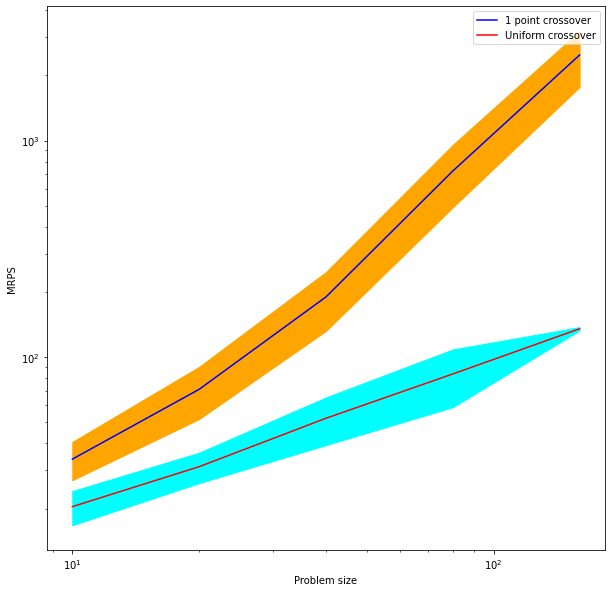

In [48]:
'''
Plot 1: MRPS in corresponding with increasing problem size
'''
# Onemax UX
mean_individual_Onemax_UX = [20.4, 31.2, 52.2, 83.6, 135.2]
stddev_individual_Onemax_UX = [3.6660605559646724, 4.995998398718719, 12.944496900227525, 24.88051446413438, 2.4]

# Onemax 1X
mean_individual_Onemax_1X = [33.8, 71.0, 189.6, 723.2, 2483.2]
stddev_individual_Onemax_1X = [6.779380502671318, 19.209372712298546, 57.47208017811779, 231.7294974749654, 717.7137033664607]


# Plot
fig1 = plt.figure(u'Plot 1', figsize=(10, 10))
e1_Onemax_UX = []
for i in range(len(mean_individual_Onemax_UX)):
    e1_Onemax_UX.append(mean_individual_Onemax_UX[i] + stddev_individual_Onemax_UX[i])

e2_Onemax_UX = []
for i in range(len(mean_individual_Onemax_1X)):
    e2_Onemax_UX.append(mean_individual_Onemax_UX[i] - stddev_individual_Onemax_UX[i])

e1_Onemax_1X = []
for i in range(len(mean_individual_Onemax_1X)):
    e1_Onemax_1X.append(mean_individual_Onemax_1X[i] + stddev_individual_Onemax_1X[i])

e2_Onemax_1X = []
for i in range(len(mean_individual_Onemax_1X)):
    e2_Onemax_1X.append(mean_individual_Onemax_1X[i] - stddev_individual_Onemax_1X[i])

error1 = e2_Onemax_UX
error2 = e2_Onemax_1X

plt.xlabel("Problem size")
plt.ylabel("MRPS")

plt.fill_between(problem_size, e1_Onemax_UX, e2_Onemax_UX, color='cyan')
plt.fill_between(problem_size, e1_Onemax_1X, e2_Onemax_1X, color='orange')

# plt.errorbar(problem_size, mean_individual_Onemax_1X, yerr=error2, fmt='-bo')
# plt.errorbar(problem_size, mean_individual_Onemax_UX, yerr=error1, fmt='-ro')

plt.plot(problem_size, mean_individual_Onemax_1X, '-b', label='1 point crossover')
plt.plot(problem_size, mean_individual_Onemax_UX, '-r', label='Uniform crossover')
plt.xscale("log")
plt.yscale("log")
# plt.title('Figure 1. Correlation between MRPS and problem size')

plt.legend()
plt.savefig('Plot-1.png')
plt.show()

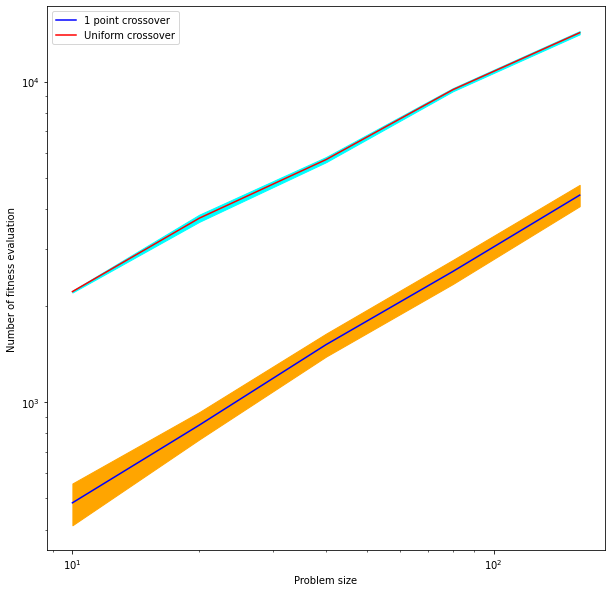

In [33]:
'''
Plot 2: Number of fitness evaluations in sGA between 1X and UX crossover
'''
mean_fitness_evaluation_Onemax_UX = [2210.4, 3745.3, 5708.3, 9430.7, 14205.0]
stddev_fitness_evaluation_Onemax_UX = [14.40971894243604, 96.23907730231001, 106.12238218208259, 106.88797874410386, 163.9669478888962]


mean_fitness_evaluation_Onemax_1X = [484.6, 846.8, 1510.0, 2554.9, 4421.6]
stddev_fitness_evaluation_Onemax_1X = [72.27475354506579, 82.90090469952665, 124.31170499997174, 220.27594058362345, 338.7802237439488]


fig1 = plt.figure(u'Plot 2', figsize=(10, 10))
e1_Onemax_UX = []
for i in range(len(mean_fitness_evaluation_Onemax_UX)):
    e1_Onemax_UX.append(mean_fitness_evaluation_Onemax_UX[i] + stddev_fitness_evaluation_Onemax_UX[i])

e2_Onemax_UX = []
for i in range(len(mean_fitness_evaluation_Onemax_1X)):
    e2_Onemax_UX.append(mean_fitness_evaluation_Onemax_UX[i] - stddev_fitness_evaluation_Onemax_UX[i])

e1_Onemax_1X = []
for i in range(len(mean_fitness_evaluation_Onemax_1X)):
    e1_Onemax_1X.append(mean_fitness_evaluation_Onemax_1X[i] + stddev_fitness_evaluation_Onemax_1X[i])

e2_Onemax_1X = []
for i in range(len(mean_fitness_evaluation_Onemax_1X)):
    e2_Onemax_1X.append(mean_fitness_evaluation_Onemax_1X[i] - stddev_fitness_evaluation_Onemax_1X[i])

error1 = e2_Onemax_UX
error2 = e2_Onemax_1X

plt.xlabel("Problem size")
plt.ylabel("Number of fitness evaluation")

plt.fill_between(problem_size, e1_Onemax_UX, e2_Onemax_UX, color='cyan')
plt.fill_between(problem_size, e1_Onemax_1X, e2_Onemax_1X, color='orange')

# plt.errorbar(problem_size, mean_individual_Onemax_1X, yerr=error2, fmt='-bo')
# plt.errorbar(problem_size, mean_individual_Onemax_UX, yerr=error1, fmt='-ro')

plt.plot(problem_size, mean_fitness_evaluation_Onemax_1X, '-b', label='1 point crossover')
plt.plot(problem_size, mean_fitness_evaluation_Onemax_UX, '-r', label='Uniform crossover')
plt.xscale("log")
plt.yscale("log")
# plt.title('Figure 2. Correlation between number of fitness evaluation and problem size')

plt.legend()
plt.savefig('Plot-2.png')
plt.show()


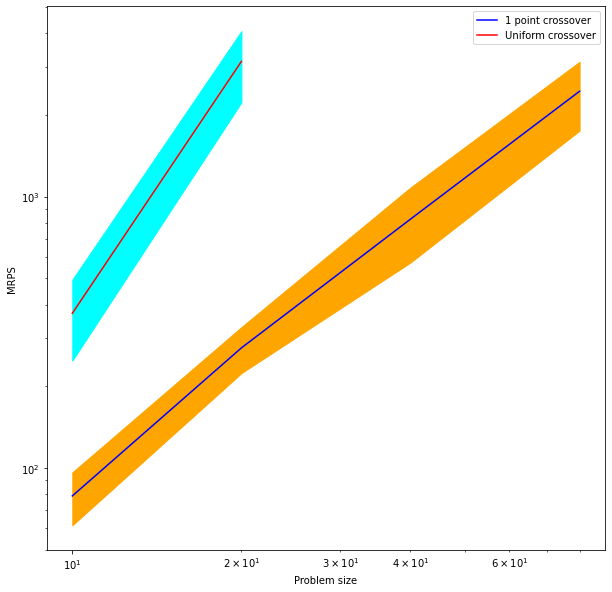

In [39]:
'''
Plot 3: Correlation between MRPS and problem size in Trap-5 function with sGA
'''

# Trap-5 1X
mean_individual_Trap_1X = [78.8, 276.8, 825.6, 2444.8]
stddev_individual_Trap_1X = [17.3896521,53.35999334,254.1264777,694.4319501]

# Trap-5 UX
mean_individual_Trap_UX = [371.2, 3148.8]
stddev_individual_Trap_UX = [122.7362122, 923.4154957]


# Plot
fig3 = plt.figure(u'Plot 3', figsize=(10, 10))
e1_Trap_UX, e2_Trap_UX, e1_Trap_1X, e2_Trap_1X = [], [], [], []
for i in range(len(mean_individual_Trap_1X)):
    e1_Trap_1X.append(mean_individual_Trap_1X[i] + stddev_individual_Trap_1X[i])
    e2_Trap_1X.append(mean_individual_Trap_1X[i] - stddev_individual_Trap_1X[i])

for i in range(len(mean_individual_Trap_UX)):
    e1_Trap_UX.append(mean_individual_Trap_UX[i] + stddev_individual_Trap_UX[i])
    e2_Trap_UX.append(mean_individual_Trap_UX[i] - stddev_individual_Trap_UX[i])


plt.xlabel("Problem size")
plt.ylabel("MRPS")

p1 = [10, 20]
p2 = [10, 20, 40, 80]
plt.fill_between(p1, e1_Trap_UX, e2_Trap_UX, color='cyan')
plt.fill_between(p2, e1_Trap_1X, e2_Trap_1X, color='orange')


plt.plot(p2, mean_individual_Trap_1X, '-b', label='1 point crossover')
plt.plot(p1, mean_individual_Trap_UX, '-r', label='Uniform crossover')
plt.xscale("log")
plt.yscale("log")
# plt.title('Figure 1. Correlation between MRPS and problem size')

plt.legend()
plt.savefig('Plot-3.png')
plt.show()

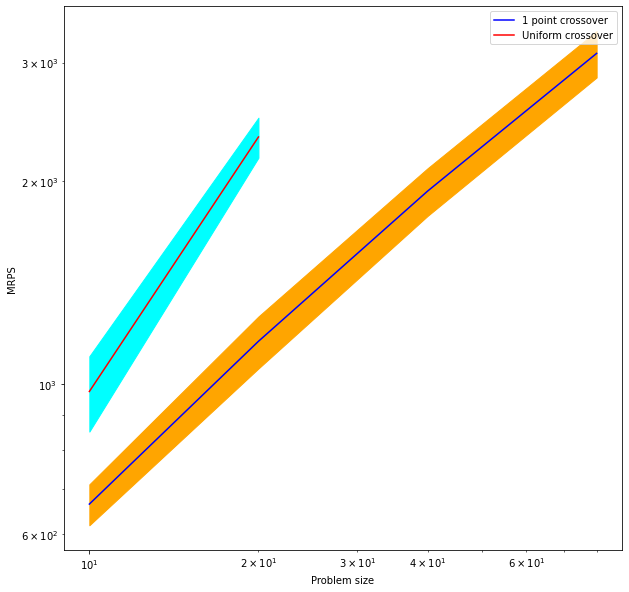

In [43]:
'''
Plot 4: Correlation between number of fitness evaluation and problem size in Trap-5 function with sGA
'''

# Trap-5 1X
num_evaluation_Trap_1X = [664.1,1158,1934,3096.4]
stddev_num_evaluation_Trap_1X = [46.39552181,102.6179538,157.1064749,244.6326952]

# Trap-5 UX
num_evaluation_Trap_UX = [975.6, 2327.2]
stddev_num_evaluation_Trap_UX = [124.8859035,158.8869619]


# Plot
fig3 = plt.figure(u'Plot 4', figsize=(10, 10))
e1_Trap_UX, e2_Trap_UX, e1_Trap_1X, e2_Trap_1X = [], [], [], []
for i in range(len(num_evaluation_Trap_1X)):
    e1_Trap_1X.append(num_evaluation_Trap_1X[i] + stddev_num_evaluation_Trap_1X[i])
    e2_Trap_1X.append(num_evaluation_Trap_1X[i] - stddev_num_evaluation_Trap_1X[i])

for i in range(len(num_evaluation_Trap_UX)):
    e1_Trap_UX.append(num_evaluation_Trap_UX[i] + stddev_num_evaluation_Trap_UX[i])
    e2_Trap_UX.append(num_evaluation_Trap_UX[i] - stddev_num_evaluation_Trap_UX[i])


plt.xlabel("Problem size")
plt.ylabel("MRPS")

p1 = [10, 20]
p2 = [10, 20, 40, 80]
plt.fill_between(p1, e1_Trap_UX, e2_Trap_UX, color='cyan')
plt.fill_between(p2, e1_Trap_1X, e2_Trap_1X, color='orange')


plt.plot(p2, num_evaluation_Trap_1X, '-b', label='1 point crossover')
plt.plot(p1, num_evaluation_Trap_UX, '-r', label='Uniform crossover')
plt.xscale("log")
plt.yscale("log")
# plt.title('Figure 1. Correlation between MRPS and problem size')

plt.legend()
plt.savefig('Plot-4.png')
plt.show()